In [1]:
%load_ext pretty_jupyter

# Goal

To use [pretty-jupyter](https://github.com/JanPalasek/pretty-jupyter) and [jinja](https://jinja.palletsprojects.com/en/stable/intro/#installation) markdown in a demo so enhance the way I report initial analysis.

Following:
- [Pretty-Jupyter Quick Start](https://pretty-jupyter.readthedocs.io/en/latest/quickstart.html#creating-our-first-pretty-notebook) guide
- [Jinja Markdown with Pretty-Jupyter](https://pretty-jupyter.readthedocs.io/en/latest/jinja_markdown.html) guide
- [Pretty-Jupyter Examples](https://github.com/JanPalasek/pretty-jupyter-examples/tree/main)

# Setup for demo

In [2]:
# dependencies
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn.objects as so
from IPython.display import display, Markdown
from pretty_jupyter.helpers import matplotlib_fig_to_html
from pretty_jupyter.helpers import matplotlib_fig_to_markdown
import plotly.express as px
sns.set_theme()

In [3]:
# support methods

In [4]:
# main
ents = pd.read_parquet("../../export/output/entities.parquet")

In [5]:
ents['dummy_col'] = ents.rd.apply(lambda x: randint(0, 1))

In [6]:
ents.sample().T

,461
name,Offender 1
role,Primary suspect in the human trafficking and i...
context,"Paid for the victim's plane ticket to Chicago,..."
confidence,0.9
rd,JD405590
dummy_col,1


# Following the above linked guides for now

These are found in the notebook metadata, but not explicit in the notebook:
- TOC: It's automatic, but can be disabled completely or for specific items in the markdown.
- Code folding: To hide/show code cells in the resulting HTML doc (the [main-features-demo](https://raw.githack.com/JanPalasek/pretty-jupyter-examples/main/main-features-demo/main-features-demo.html) shows how this works).

In [7]:
a = 10
b = 3

## Set styling

In [8]:
%%html

<style>
    #Styling {
        font-weight: bold;
        font-family: Helvetica;
    }
</style>

## Referencing variables in text

- When using jinja markdown, the cell should be in code format, not markdown, tho it will use cell magic to convert and render contents when ran.

In [9]:
%%jinja markdown

We wrote `%%jinja markdown` on the first line and this transforms the code cell into a Jinja Markdown cell.

Now we seamlessly combine Python variable "a" from before as simple as this: {{ a }}.


We wrote `%%jinja markdown` on the first line and this transforms the code cell into a Jinja Markdown cell.

Now we seamlessly combine Python variable "a" from before as simple as this: 10.

## Rounding variables to format in text

In [10]:
%%jinja markdown

An example of rounding: {{ (10 / 3) | round(2) }}


An example of rounding: 3.33

## Inserting Fractions

In [11]:
%%jmd

$$
\frac{a}{b} = \frac{ {{a}} }{ {{b}} } = {{ (a / b) | round(2) }}
$$


$$
\frac{a}{b} = \frac{ 10 }{ 3 } = 3.33
$$

## Inserting Tables

In [12]:
%%jmd
<details>
<summary>LLM-extracted entity data from document collection.</summary>

{{ ents.head().to_html() }}

</details>

<details>
<summary>LLM-extracted entity data from document collection.</summary>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>role</th>
      <th>context</th>
      <th>confidence</th>
      <th>rd</th>
      <th>dummy_col</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Victim</td>
      <td>Victim of human trafficking and involuntary servitude</td>
      <td>The entire report revolves around this individual's case</td>
      <td>0.95</td>
      <td>HZ192829</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Offender</td>
      <td>Suspected human trafficker and abuser of the victim</td>
      <td>The report mentions the offender's actions and the victim's allegations against them</td>
      <td>0.85</td>
      <td>HZ192829</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Witness</td>
      <td>Provided information about the victim's situation and the offender's actions</td>
      <td>The witness was taken into custody and transported for processing</td>
      <td>0.80</td>
      <td>HZ192829</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>James Butler</td>
      <td>Sergeant who informed the officers about the victim's missing person report and contacted St. Louis County Police</td>
      <td>Mentioned in the narrative section of the report</td>
      <td>1.00</td>
      <td>HZ192829</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Taylor</td>
      <td>Detective from St. Louis County Police who reported the victim as missing</td>
      <td>Mentioned in the narrative section of the report</td>
      <td>0.90</td>
      <td>HZ192829</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

</details>

## Inserting plots

In [13]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])


The figure is displayed below:

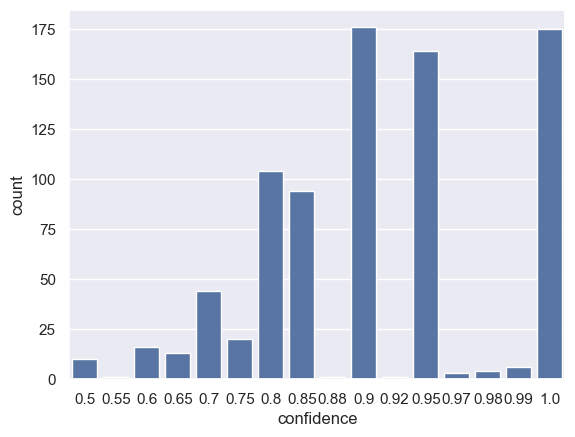

And we can continue our text further here.

In [14]:
%%jmd

The figure is displayed below:

{{ matplotlib_fig_to_html(sns.countplot(x=ents.confidence).figure) }}

And we can continue our text further here.


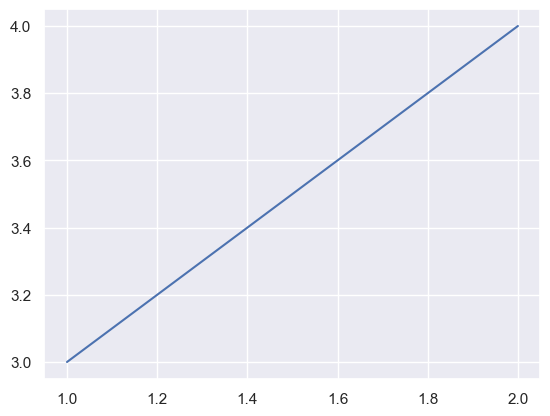

In [15]:
%%jmd

{{ matplotlib_fig_to_html(plt.plot([1, 2], [3, 4])[0].figure) }}

In [16]:
%%jmd

It is simple to use it with Jinja Markdown.

{{ fig.to_html(include_plotlyjs=False, full_html=False, default_height=400, default_width=600) }}


It is simple to use it with Jinja Markdown.

<div>                            <div id="c10a9bd5-b2f3-441e-9a1c-a09907e122bb" class="plotly-graph-div" style="height:400px; width:600px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("c10a9bd5-b2f3-441e-9a1c-a09907e122bb")) {                    Plotly.newPlot(                        "c10a9bd5-b2f3-441e-9a1c-a09907e122bb",                        [{"alignmentgroup":"True","hovertemplate":"x=%{x}\u003cbr\u003ey=%{y}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"","marker":{"color":"#636efa","pattern":{"shape":""}},"name":"","offsetgroup":"","orientation":"v","showlegend":false,"textposition":"auto","x":["a","b","c"],"xaxis":"x","y":[1,3,2],"yaxis":"y","type":"bar"}],                        {"template":{"data":{"histogram2dcontour":[{"type":"histogram2dcontour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"choropleth":[{"type":"choropleth","colorbar":{"outlinewidth":0,"ticks":""}}],"histogram2d":[{"type":"histogram2d","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmap":[{"type":"heatmap","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmapgl":[{"type":"heatmapgl","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"contourcarpet":[{"type":"contourcarpet","colorbar":{"outlinewidth":0,"ticks":""}}],"contour":[{"type":"contour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"surface":[{"type":"surface","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"mesh3d":[{"type":"mesh3d","colorbar":{"outlinewidth":0,"ticks":""}}],"scatter":[{"fillpattern":{"fillmode":"overlay","size":10,"solidity":0.2},"type":"scatter"}],"parcoords":[{"type":"parcoords","line":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolargl":[{"type":"scatterpolargl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"bar"}],"scattergeo":[{"type":"scattergeo","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolar":[{"type":"scatterpolar","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"histogram":[{"marker":{"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"histogram"}],"scattergl":[{"type":"scattergl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatter3d":[{"type":"scatter3d","line":{"colorbar":{"outlinewidth":0,"ticks":""}},"marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattermapbox":[{"type":"scattermapbox","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterternary":[{"type":"scatterternary","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattercarpet":[{"type":"scattercarpet","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"carpet":[{"aaxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"baxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"type":"carpet"}],"table":[{"cells":{"fill":{"color":"#EBF0F8"},"line":{"color":"white"}},"header":{"fill":{"color":"#C8D4E3"},"line":{"color":"white"}},"type":"table"}],"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"pie":[{"automargin":true,"type":"pie"}]},"layout":{"autotypenumbers":"strict","colorway":["#636efa","#EF553B","#00cc96","#ab63fa","#FFA15A","#19d3f3","#FF6692","#B6E880","#FF97FF","#FECB52"],"font":{"color":"#2a3f5f"},"hovermode":"closest","hoverlabel":{"align":"left"},"paper_bgcolor":"white","plot_bgcolor":"#E5ECF6","polar":{"bgcolor":"#E5ECF6","angularaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"radialaxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"ternary":{"bgcolor":"#E5ECF6","aaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"baxis":{"gridcolor":"white","linecolor":"white","ticks":""},"caxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"coloraxis":{"colorbar":{"outlinewidth":0,"ticks":""}},"colorscale":{"sequential":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"sequentialminus":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"diverging":[[0,"#8e0152"],[0.1,"#c51b7d"],[0.2,"#de77ae"],[0.3,"#f1b6da"],[0.4,"#fde0ef"],[0.5,"#f7f7f7"],[0.6,"#e6f5d0"],[0.7,"#b8e186"],[0.8,"#7fbc41"],[0.9,"#4d9221"],[1,"#276419"]]},"xaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"yaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"scene":{"xaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"yaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"zaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2}},"shapedefaults":{"line":{"color":"#2a3f5f"}},"annotationdefaults":{"arrowcolor":"#2a3f5f","arrowhead":0,"arrowwidth":1},"geo":{"bgcolor":"white","landcolor":"#E5ECF6","subunitcolor":"white","showland":true,"showlakes":true,"lakecolor":"white"},"title":{"x":0.05},"mapbox":{"style":"light"}}},"xaxis":{"anchor":"y","domain":[0.0,1.0],"title":{"text":"x"}},"yaxis":{"anchor":"x","domain":[0.0,1.0],"title":{"text":"y"}},"legend":{"tracegroupgap":0},"margin":{"t":60},"barmode":"relative"},                        {"responsive": true}                    )                };                            </script>        </div>

## Tabsets - not working atm?

- [tabsets-demo](https://raw.githack.com/JanPalasek/pretty-jupyter-examples/main/dynamic-tabsets/dynamic-tabsets.html) shows the potential a little better than this. I want to keep the reference code here as unchanged as possible, but will think more about how to utilize this with the data I have.

In [17]:
%%jmd

### setup for tabsets
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

Sometimes we want to create tabsets dynamically, meaning we want to generate them based on a code.
Pretty Jupyter supports this by using Jinja Markdown cells.


### setup for tabsets
<span class='pj-token' style='display: none;'>.tabset|O_O|.tabset-pills|O_O|.tabset-fade</span>

Sometimes we want to create tabsets dynamically, meaning we want to generate them based on a code.
Pretty Jupyter supports this by using Jinja Markdown cells.

In [18]:
data = pd.DataFrame({"a": [1, 2, 3, 4], "b": [4, 3, 2, 1], "c": [1, 4, 2, 3]})

### with jinja




#### Tabset for column a



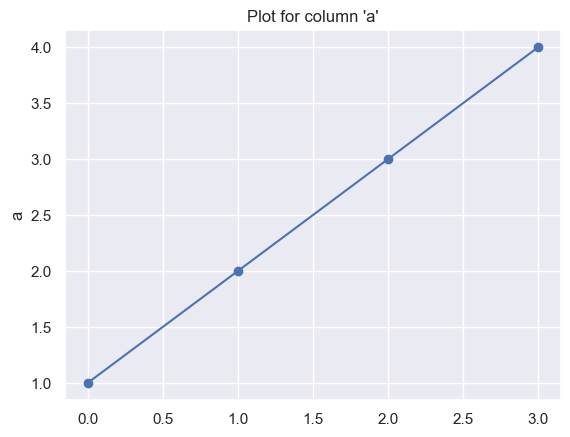



#### Tabset for column b



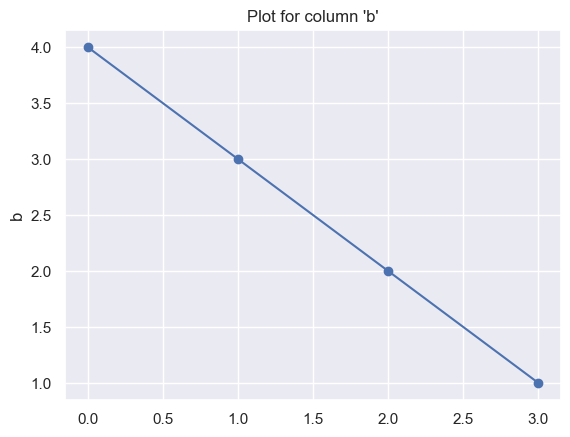



#### Tabset for column c



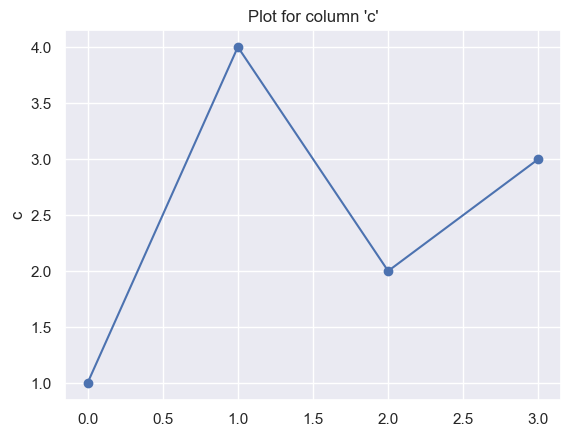


In [19]:
%%jmd

{% for col in data.columns %}

#### Tabset for column {{ col }}

{% set obj = plt.subplots() %}
{% set _ = so.Plot(
    x=np.arange(data.shape[0]),
    y=data[col]).add(
    so.Line(marker="o")
    ).label(title="Plot for column '{}'".format(col), y=col).on(
    obj[1]).plot() %}
{{ matplotlib_fig_to_markdown(obj[0]) }}

{% endfor %}

### without jinja

#### Tabset for column a

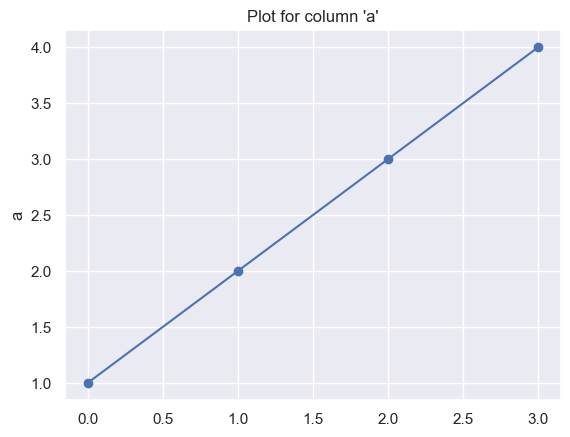

#### Tabset for column b

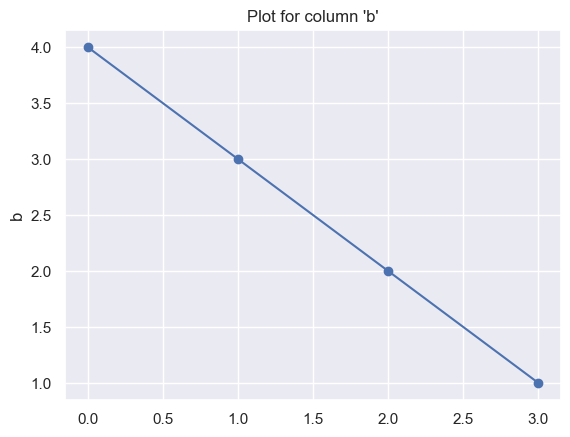

#### Tabset for column c

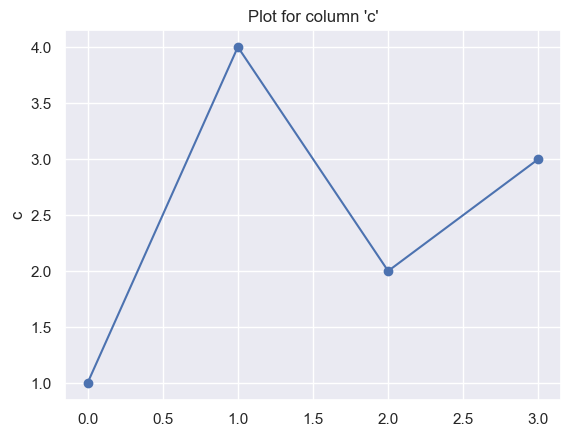

In [20]:
for col in data.columns:
    display(Markdown(f"#### Tabset for column {col}"))

    fig, ax = plt.subplots()
    so.Plot(
        x=np.arange(data.shape[0]),
        y=data[col]).add(
        so.Line(marker="o")).label(title="Plot for column '{}'".format(col), y=col).on(
        ax).plot()
    display(Markdown(matplotlib_fig_to_markdown(ax.figure)))

### trying another way

In [23]:
%%jmd

### Tabset Root
[//]: # (-.- .tabset .tabset-pills)

The content of this section will be shown as tabs. This will help us avoid potential scrolling and improve the HTML UI.

#### First Tab
In the first tab, we can show some graphs or tables. We can output the table like this:

{{ data.head().to_html() }}

#### Second Tab
In the second tab, we can do the same. Btw maths also works in the tabs.

#### Not a Tabset
This section will not be tabbed because it has the same level (or higher) as the Tabset Root.


### Tabset Root
<span class='pj-token' style='display: none;'>.tabset|O_O|.tabset-pills</span>

The content of this section will be shown as tabs. This will help us avoid potential scrolling and improve the HTML UI.

#### First Tab
In the first tab, we can show some graphs or tables. We can output the table like this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>a</th>
      <th>b</th>
      <th>c</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>4</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>3</td>
      <td>4</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>1</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

#### Second Tab
In the second tab, we can do the same. Btw maths also works in the tabs.

#### Not a Tabset
This section will not be tabbed because it has the same level (or higher) as the Tabset Root.

## Export

In [24]:
# Note that you have to view the resulting HTML file as a new browser tab, not a tab in jupyter lab, to get the effect
!jupyter nbconvert --to html --template pj "demo-pretty.ipynb"

[NbConvertApp] Converting notebook demo-pretty.ipynb to html
[NbConvertApp] Writing 5941354 bytes to demo-pretty.html
